In [131]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# 선형 회귀분석을 하는 경우에는 위 클래스를 사용
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm


In [132]:
import pandas as pd
import numpy as np
normalized_data_row = pd.read_csv('C:/Users/82108/Desktop/jw/프로젝트/상관분석/학습데이터.csv') 
normalized_data = normalized_data_row.copy()
normalized_data = normalized_data.iloc[:,3:]
normalized_data
sample = normalized_data_row.copy()
sample = sample[['Gu',	'Dong']]
sample
# Robust Scaler 이용한 정규화
# 중앙값0, 사분위수 IQR 기준 정규화


,Gu,Dong
0,동대문구,이문동
1,동대문구,장안동
2,동대문구,전농동
3,동대문구,회기동
4,동대문구,답십리동
...,...,...
82,중랑구,상봉동
83,중랑구,신내동
84,중랑구,중화동
85,종로구,창신동


In [148]:
소유자 = normalized_data_row['Pet_Owners']

In [134]:
from sklearn.preprocessing import RobustScaler

def normalization(normalized_data):
    scaler = RobustScaler()
    df_robust = scaler.fit_transform(normalized_data)
    return scaler, df_robust

def reverse_normalization(scaler, predict_data):
    reversed_predict_data = scaler.inverse_transform(predict_data)
    return reversed_predict_data

scaler, df_robust = normalization(normalized_data)
df_robust = pd.DataFrame(df_robust)
df_robust


,0,1,2,3,4,5,6,7,8,9
0,-0.211954,-0.386707,-0.148377,-0.545455,-0.727273,-0.5,-0.736842,-0.571429,-0.666667,-0.888889
1,0.422004,0.177644,0.244805,0.545455,0.727273,-0.5,0.736842,0.285714,0.666667,0.666667
2,0.000000,-0.300101,-0.282468,-0.363636,-0.727273,0.0,-0.631579,-0.285714,-0.500000,-0.666667
3,-0.806137,-0.813293,-0.810065,-0.727273,-0.727273,-0.5,-0.842105,-0.714286,-0.666667,-1.000000
4,0.102896,-0.173615,-0.094805,0.181818,-0.545455,-0.5,-0.210526,0.000000,-0.500000,-0.333333
...,...,...,...,...,...,...,...,...,...,...
82,-0.154398,-0.038268,-0.138961,-0.363636,0.181818,0.0,-0.105263,-0.285714,0.333333,-0.111111
83,0.136574,0.124068,0.000000,0.000000,-0.545455,0.0,-0.315789,0.000000,-0.333333,-0.333333
84,-0.173205,0.005639,-0.086039,0.000000,0.181818,-0.5,0.105263,-0.142857,0.166667,0.000000
85,-0.659656,-0.560725,-0.511688,-0.727273,-0.545455,-0.5,-0.736842,-0.714286,-0.500000,-0.888889


In [135]:
df_robust.rename(columns ={0:'Population', 
                                       1:'Pet_Owners',
                                       2:'Total_Registrations',	
                                       3:'hospital',
                                       4:'product',	
                                       5:'beauty',	
                                       6:'h+p',	
                                       7:'h+b',	
                                       8:'p+b',	
                                       9:'h+p+b'}, inplace=True)

df_robust
data = pd.concat([sample, df_robust], axis = 1)
data

,Gu,Dong,Population,Pet_Owners,Total_Registrations,hospital,product,beauty,h+p,h+b,p+b,h+p+b
0,동대문구,이문동,-0.211954,-0.386707,-0.148377,-0.545455,-0.727273,-0.5,-0.736842,-0.571429,-0.666667,-0.888889
1,동대문구,장안동,0.422004,0.177644,0.244805,0.545455,0.727273,-0.5,0.736842,0.285714,0.666667,0.666667
2,동대문구,전농동,0.000000,-0.300101,-0.282468,-0.363636,-0.727273,0.0,-0.631579,-0.285714,-0.500000,-0.666667
3,동대문구,회기동,-0.806137,-0.813293,-0.810065,-0.727273,-0.727273,-0.5,-0.842105,-0.714286,-0.666667,-1.000000
4,동대문구,답십리동,0.102896,-0.173615,-0.094805,0.181818,-0.545455,-0.5,-0.210526,0.000000,-0.500000,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
82,중랑구,상봉동,-0.154398,-0.038268,-0.138961,-0.363636,0.181818,0.0,-0.105263,-0.285714,0.333333,-0.111111
83,중랑구,신내동,0.136574,0.124068,0.000000,0.000000,-0.545455,0.0,-0.315789,0.000000,-0.333333,-0.333333
84,중랑구,중화동,-0.173205,0.005639,-0.086039,0.000000,0.181818,-0.5,0.105263,-0.142857,0.166667,0.000000
85,종로구,창신동,-0.659656,-0.560725,-0.511688,-0.727273,-0.545455,-0.5,-0.736842,-0.714286,-0.500000,-0.888889


In [136]:
# 필요없는 열 제거
data = data.drop(['Gu','Dong','product','beauty','p+b'],axis=1)
data.head(1)

,Population,Pet_Owners,Total_Registrations,hospital,h+p,h+b,h+p+b
0,-0.211954,-0.386707,-0.148377,-0.545455,-0.736842,-0.571429,-0.888889


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           87 non-null     float64
 1   Pet_Owners           87 non-null     float64
 2   Total_Registrations  87 non-null     float64
 3   hospital             87 non-null     float64
 4   h+p                  87 non-null     float64
 5   h+b                  87 non-null     float64
 6   h+p+b                87 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


In [138]:
# 타입 변경
#data['Pet_Owners'] = data['Pet_Owners'].astype(int)
#data['Total_Registrations'] = data['Total_Registrations'].astype(int)
#data.info()

In [139]:
# 독립변수, 종속변수 분리

# 함수 사용하여 데이터 분리
independent = list(data.columns.difference(['Pet_Owners']))
# 'Pet_Owners'란 이름과 다른 열을 리스트로 뽑음

# 독립변수들
independent = data[independent]

# 독립변수 나누기
independent_registration = independent[['Total_Registrations']]
independent_reg_pop = independent[['Total_Registrations','Population']]
independent_reg_pop_h = independent[['Total_Registrations','Population', 'hospital']]

# 종속변수들
bound = 소유자

# 독립변수 확인
independent.columns

Index(['Population', 'Total_Registrations', 'h+b', 'h+p', 'h+p+b', 'hospital'], dtype='object')

In [140]:
# independent_registration

# 학습데이터(test)와 평가데이터(train) 8:2 비율로 만들기

x1 = independent_registration   # 독립변수 = 총등록수
x2 = independent_reg_pop        # 독립변수 = 총등록수, 인구수
x3 = independent_reg_pop_h      # 독립변수 = 총등록수, 인구수, 병원
y = bound                       # 종속변수 = 소유자수
train_x1, test_x1, train_x2, test_x2, train_x3, test_x3, train_y, test_y = train_test_split(x1, x2, x3, y, test_size =0.2, random_state=42 )

train_x1 = np.array(train_x1).reshape(-1,1)
test_x1 = np.array(test_x1).reshape(-1,1)
train_x2 = train_x2.astype(float)
test_x2 = test_x2.astype(float)
train_x3 = train_x3.astype(float)
test_x3 = test_x3.astype(float)

train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)
test_y = pd.DataFrame(test_y)
#train_y = pd.DataFrame(train_y)

print('train_x1.shape = ', train_x1.shape,'test_x1.shape = ', test_x1.shape) 
print('train_x2.shape = ', train_x2.shape,'test_x2.shape = ', test_x2.shape) 
print('train_x3.shape = ', train_x3.shape,'test_x3.shape = ', test_x3.shape) 
print('train_y.shape = ', train_y.shape, 'test_y.shape = ',test_y.shape) 

train_x1.shape =  (69, 1) test_x1.shape =  (18, 1)
train_x2.shape =  (69, 2) test_x2.shape =  (18, 2)
train_x3.shape =  (69, 3) test_x3.shape =  (18, 3)
train_y.shape =  (69, 1) test_y.shape =  (18, 1)


회귀분석 모델 구축
- x : registration

In [141]:
# 학습 데이터를 활용하여 반려동물 등록 수와 소유자 수 사이의 관계 파악


# 회귀 모델 적합

model = LinearRegression()
# model = LinearRegression(fit_intercept=True)
# fit_intercept인수는 상수항이 있는지 없는 지를 결정하는 인수 (default=true)
# 이 모델은 입력 데이터와 목표 변수 간의 선형 관계를 모델링
# 새로운 데이터에 대한 예측 수행
result1 = model.fit(train_x1, train_y)
# 가중치 값을 추정
# 상수항 결합을 자동으로 해주므로 사용자가 직접 상수항 결합을 할 필요 없음
# >> 모델은 최적의 가중치(계수)와 편향성(상수항)을 추정 
# >> 가중치와 편향을 추정하는 과정에서 잔차 최소화
# 생성된 모델을 입력 데이터(x)와 목표변수(y)에 대해 학습시키는 과정

predict1 = result1.predict(test_x1)
predict1 = pd.DataFrame(predict1)


# 결과 출력
predict1

,0
0,3875.394345
1,1876.993234
2,1592.611328
3,2468.940354
4,2339.113831
5,8614.062409
6,4475.069234
7,718.600634
8,2004.501426
9,4563.165803


In [142]:
# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict1)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict1.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict1.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
        
 
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3875.39
예측의 정확도: 98.20%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1876.99
예측의 정확도: 60.34%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1592.61
예측의 정확도: 96.18%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2468.94
예측의 정확도: 98.32%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2339.11
예측의 정확도: 96.86%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 8614.06
예측의 정확도: 89.77%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4475.07
예측의 정확도: 98.27%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 718.60
예측의 정확도: 92.75%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 2004.50
예측의 정확도: 92.98%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4563.17
예측의 정확도: 88.50%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2025.37
예측의 정확도: 87.38%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 1061.71
예측의 정확도: 95.81%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1307.46
예측의 정확도: 93.01%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 6583.20
예측의 정확도: 91.17%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 2230.15
예측의 정확도: 85.38%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3968.90
예측의 정확도: 98.98%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 11290.96
예측의 정확도: 92.59%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2080.23
예측의 정확도: 92.21%
--

회귀분석 모델 구축
- x : registration + population

In [143]:
# 학습 데이터를 활용하여 반려동물 등록 수와 소유자 수 사이의 관계 파악


# 회귀 모델 적합

model = LinearRegression()

result2 = model.fit(train_x2, train_y)

predict2 = result2.predict(test_x2)
predict2 = pd.DataFrame(predict2)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict2)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict2.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict2.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict2.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3862.65
예측의 정확도: 98.54%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1873.27
예측의 정확도: 60.62%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1580.63
예측의 정확도: 96.96%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2458.62
예측의 정확도: 97.91%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2347.31
예측의 정확도: 96.50%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 8619.68
예측의 정확도: 89.83%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4445.78
예측의 정확도: 98.94%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 714.16
예측의 정확도: 93.41%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 2010.27
예측의 정확도: 92.67%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4561.14
예측의 정확도: 88.46%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2020.56
예측의 정확도: 87.17%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 1060.93
예측의 정확도: 95.89%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1306.22
예측의 정확도: 93.11%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 6575.41
예측의 정확도: 91.06%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 2233.34
예측의 정확도: 85.50%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3960.67
예측의 정확도: 99.19%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 11295.71
예측의 정확도: 92.54%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2082.21
예측의 정확도: 92.30%
--

회귀분석 모델 구축
- x : registration + population + hospital

In [144]:
# 학습 데이터를 활용하여 독립변수(반려동물 등록 수와 소유자 수, 병원 수)와 종속변수 사이의 관계 파악


# 회귀 모델 적합

model = LinearRegression()

result3 = model.fit(train_x3, train_y)

predict3 = result3.predict(test_x3)
predict3 = pd.DataFrame(predict3)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predict3)):
        print(i)
        print(f'실제 소유자 수 : {test_y.iloc[i,0]}')
        print(f'추정된 소유자 수: {predict3.iloc[i,0]:.2f}')
        print(f'예측의 정확도: {100*(1- abs(predict3.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0]):.2f}%')
        accuracy = 100*(1- abs(predict3.iloc[i,0] - test_y.iloc[i,0])/test_y.iloc[i,0])
        accuracy_list.append(accuracy)
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f'총 정확도: {total_accuracy:.2f}%')

0
실제 소유자 수 : 3807.0
추정된 소유자 수: 3863.90
예측의 정확도: 98.51%
1
실제 소유자 수 : 1344.0
추정된 소유자 수: 1879.80
예측의 정확도: 60.13%
2
실제 소유자 수 : 1534.0
추정된 소유자 수: 1564.26
예측의 정확도: 98.03%
3
실제 소유자 수 : 2511.0
추정된 소유자 수: 2453.45
예측의 정확도: 97.71%
4
실제 소유자 수 : 2268.0
추정된 소유자 수: 2336.45
예측의 정확도: 96.98%
5
실제 소유자 수 : 9596.0
추정된 소유자 수: 8613.22
예측의 정확도: 89.76%
6
실제 소유자 수 : 4399.0
추정된 소유자 수: 4452.42
예측의 정확도: 98.79%
7
실제 소유자 수 : 670.0
추정된 소유자 수: 700.95
예측의 정확도: 95.38%
8
실제 소유자 수 : 1873.0
추정된 소유자 수: 2007.59
예측의 정확도: 92.81%
9
실제 소유자 수 : 5156.0
추정된 소유자 수: 4560.53
예측의 정확도: 88.45%
10
실제 소유자 수 : 2318.0
추정된 소유자 수: 2020.54
예측의 정확도: 87.17%
11
실제 소유자 수 : 1019.0
추정된 소유자 수: 1063.71
예측의 정확도: 95.61%
12
실제 소유자 수 : 1222.0
추정된 소유자 수: 1310.12
예측의 정확도: 92.79%
13
실제 소유자 수 : 7221.0
추정된 소유자 수: 6579.23
예측의 정확도: 91.11%
14
실제 소유자 수 : 2612.0
추정된 소유자 수: 2234.13
예측의 정확도: 85.53%
15
실제 소유자 수 : 3929.0
추정된 소유자 수: 3964.70
예측의 정확도: 99.09%
16
실제 소유자 수 : 10512.0
추정된 소유자 수: 11323.16
예측의 정확도: 92.28%
17
실제 소유자 수 : 2256.0
추정된 소유자 수: 2089.58
예측의 정확도: 92.62%
--

반려동물 소유자 수 예측 모델

유의성 검정
- 모델이 데이터를 잘 설명하는지 여부
- 검정통계량을 사용하여 모델의 설명력을 통계적으로 판단
- statsmodels의 OLS 명령으로 선형회귀

In [145]:
# 수동으로 상수항 추가
train_x1 = sm.add_constant(train_x1)
# y = a*x + b
# 이때 b는 상수항
# sm.add_constant(x)을 사용하면 상수항이 있는 회귀 모델을 적합할 수 있음


model1 = sm.OLS(train_y, train_x1).fit()
# 유의성 검정을 위해 최소 자승법을 사용하는 함수인 sm.OLS() 사용
# ols 회귀 모델은 주어진 데이터에 가장 적합한 선형회귀식을 추정
# 이때 sm.OLS()는 ols(최소자승법)을 사용하여 선형회귀에 적합
# 이는 독립변수 x와 종속변수 y 간의 선형관계를 나타내는 모델 구축

# F-검정
f_statistic = model1.fvalue  # 검정통계량
# 검정통계량이 클수록 회귀모델이 유의
p_value = model1.f_pvalue

# 결과 출력
print("F-statistic:", f_statistic)
print(f'p-value: {p_value:.2f}')

'''
유의수준을 0.05라 할 때(95% 신뢰수준)
- 귀무가설: 회귀모형이 유의하지 않다.
- 대립가설: 회귀모형이 유의하다.

회귀모형의 유의성 검정은 검정통계량 F값이 48933이고,
유의확률 p값이 0으로 유의수준0.05보다 작으므로
귀무가설을 기각하고, 대립가설을 채택한다.
즉, 회귀 모델은 통계적으로 유의함.

'''

F-statistic: 16155.048402441429
p-value: 0.00


'\n유의수준을 0.05라 할 때(95% 신뢰수준)\n- 귀무가설: 회귀모형이 유의하지 않다.\n- 대립가설: 회귀모형이 유의하다.\n\n회귀모형의 유의성 검정은 검정통계량 F값이 48933이고,\n유의확률 p값이 0으로 유의수준0.05보다 작으므로\n귀무가설을 기각하고, 대립가설을 채택한다.\n즉, 회귀 모델은 통계적으로 유의함.\n\n'

교차 검정
- 주어진 데이터를 여러 번 반복해서 나누어 평가
- 종속변수의 값을 알아내고, 그 종속 변수 값을 얼마나 잘 예측하는 가를 

k-폴드 교차 검정
- 데이터의 수가 적은 경우에 학습과 검증을 반복하는 k폴드 교차 검정

In [146]:
# 데이터 준비
x = x1  # 독립 변수
y = y # 종속 변수

# 모델 정의
model = LinearRegression()

# 교차 검증 수행
kfold = KFold(n_splits=5, shuffle=True, random_state=42)    # KFold 클래스 교차 검증
# 데이터를 5개의 Fold로 나누고 5-fold 교차 검증 수행,
# shuffle=True 무작위로 섞어서 분할
scores = cross_val_score(model, x, y, cv=kfold, scoring='r2')  # , R-squared로 평가
# cross_val_score함수를 사용하여 모델을 평가
# scoring='r2' : 평가 지표로 R-squared를 사용, 각 fold에서 모델의 R-squared계산
# rsquared(수정된 결정계수) = 1 - rss(잔차제곱합) / tss(총제곱합)


# fold의 성능 출력
for i in range(len(scores)):
    print(f'{i+1}번 fold의 R-squared: {scores[i]:.4f}')


print("평균 R-squared:", round(np.mean(scores),4))
#>> 매우 높은 설명력을 가짐

'''
# 동작, 동대문,  종로
각 fold의 R-squared: [0.98752059 0.99855989 0.99737419 0.9946932  0.995287  ]
평균 R-squared: 0.9946869742565878
# 각 fold의 R-squared 값은 fold에서 회귀모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표
# 0에서 1 사이의 값을 가짐. 1에 가까울수록 모델이 데이터를 잘 설몀

## 동대문,동작,종로,광진구,금천구
각 fold의 R-squared: [0.98329415 0.99175426 0.98825034 0.99955781 0.99616499]
평균 R-squared: 0.9918043104102539
'''

# 각 fold의 R-squared 값은 해당 fold에서 모델의 설명력을 나타냄
# R-squared 는 회귀 모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표
# 평균 R-squared은 해당 모델이 전체 데이터에서 얼마나 잘 설명하는 지 평균적인 정확도

# 결정계수는 독립변수의 수가 증가함에 따라 증가하므로,
# 독립변수를 추가할 때마다 결정계수가 증가한다는 단점을 가짐
# 수정된 결정계수는 이를 보완한 것으로 불필요한 독립변수가 추가되는 경우, 
# 수정된 결정계수는 증가하지 않고 감소할 수 있다.

1번 fold의 R-squared: 0.9792
2번 fold의 R-squared: 0.9949
3번 fold의 R-squared: 0.9981
4번 fold의 R-squared: 0.9951
5번 fold의 R-squared: 0.9933
평균 R-squared: 0.9921


'\n# 동작, 동대문,  종로\n각 fold의 R-squared: [0.98752059 0.99855989 0.99737419 0.9946932  0.995287  ]\n평균 R-squared: 0.9946869742565878\n# 각 fold의 R-squared 값은 fold에서 회귀모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표\n# 0에서 1 사이의 값을 가짐. 1에 가까울수록 모델이 데이터를 잘 설몀\n\n## 동대문,동작,종로,광진구,금천구\n각 fold의 R-squared: [0.98329415 0.99175426 0.98825034 0.99955781 0.99616499]\n평균 R-squared: 0.9918043104102539\n'

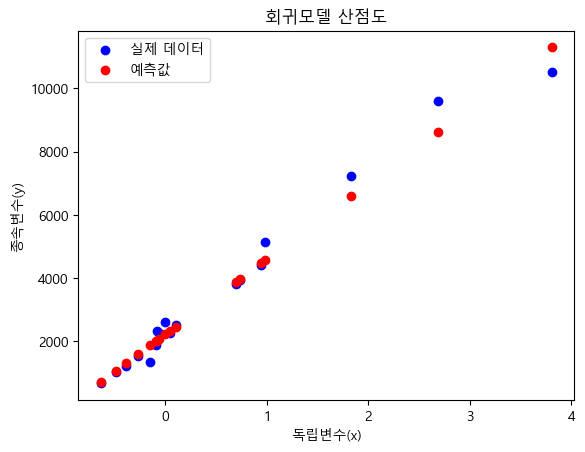

In [147]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.scatter(test_x1, test_y, color='blue', label='실제 데이터')
plt.scatter(test_x1, predict1, color='red', label='예측값')
plt.xlabel('독립변수(x)')
plt.ylabel('종속변수(y)')
plt.title('회귀모델 산점도')
plt.legend()
plt.show()